<a href="https://colab.research.google.com/github/VoTanThinh/googlecolab/blob/main/AUTOMOBILECRUISECONTROL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=03cd4d28436bdbc4d2d87b6011ff04f635a8c89df7ee2b03ca6601d14a7a0beb
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


<ipython-input-7-d5f30710f848>:61: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
<ipython-input-7-d5f30710f848>:62: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
<ipython-input-7-d5f30710f848>:63: UserWarning: The following kwargs were not used by contour: 'offet', 'anpha'
  cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)


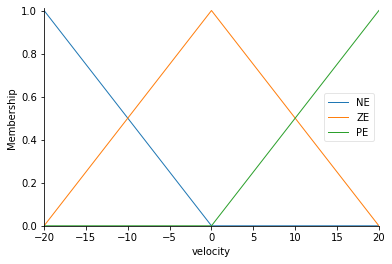

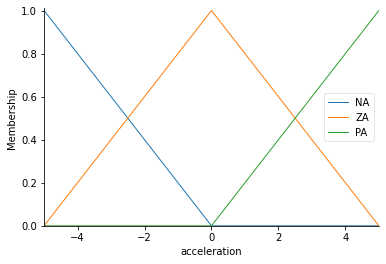

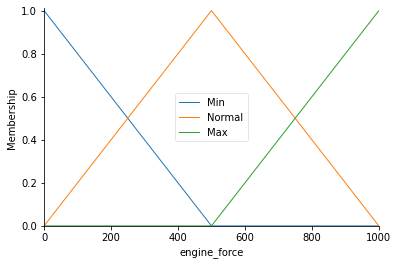

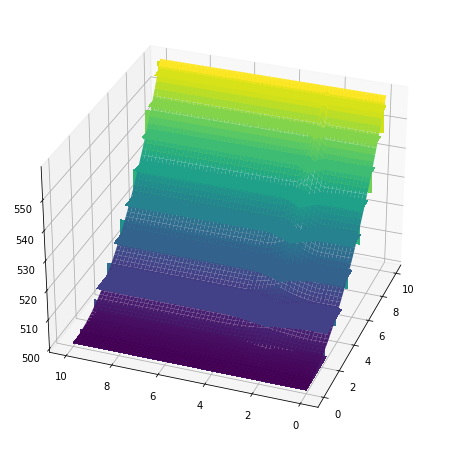

In [7]:
from IPython.utils.process import system
from matplotlib.pyplot import triplot
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

velocity = np.linspace(-20,20,61) # chia khoang 0-10 thanhf 61 phaanf thuw
acceleration= np.linspace(-5,5,61)
engine_force= np.linspace(0,1000,61)

velocity= ctrl.Antecedent(velocity,'velocity')
acceleration= ctrl.Antecedent(acceleration,'acceleration')


engine_force = ctrl.Consequent(engine_force,'engine_force')


names1 = ['NE','ZE','PE'] # gia tri phai laf ler 
names2 = ['NA','ZA','PA']
names3=['Min','Normal','Max']

velocity.automf(names=names1) # chia khoan cho tung bieeur ddofo teen dg bieu do
acceleration.automf(names=names2)
engine_force.automf(names=names3)

velocity.view()
acceleration.view()
engine_force.view()


rule0 = ctrl.Rule(antecedent=((velocity['NE']&acceleration['NA'])|(velocity['NE']&acceleration['ZA'])|(velocity['NE']&acceleration['PA'])
),consequent=engine_force['Min'], label= 'rule Min')

rule1 = ctrl.Rule(antecedent=((velocity['ZE']&acceleration['NA'])|(velocity['ZE']&acceleration['ZA'])|(velocity['ZE']&acceleration['PA'])
),consequent=engine_force['Normal'], label= 'rule Normal')

rule2 = ctrl.Rule(antecedent=((velocity['PE']&acceleration['NA'])|(velocity['PE']&acceleration['ZA'])|(velocity['PE']&acceleration['PA'])
),consequent=engine_force['Max'], label= 'rule Max')

system = ctrl.ControlSystem(rules=[rule0,rule1,rule2])


sim = ctrl.ControlSystemSimulation(system, flush_after_run= 61*61+1)
upsampled = np.linspace(00,10,61)
x,y = np.meshgrid(upsampled,upsampled)
z= np.zeros_like(x)
for i in range(61):
  for j in range(61):
    sim.input['velocity'] = x[i,j]
    sim.input['acceleration'] = y[i,j]
    
    sim.compute()
    z[i,j] = sim.output['engine_force']
    
#phaanf hien thi
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d') #vị trí tọa độ 1 1 1
suf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)
cset = ax.contourf(x, y, z, zdir = 'z', offet = 9, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'x', offet = 11, cmap = 'viridis', anpha = 0.5)
cset = ax.contourf(x, y, z, zdir = 'y', offet = 11, cmap = 'viridis', anpha = 0.5)
ax.view_init(30,200)
